# <b>H1B VISA PREDICTOR 

# Making necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data preprocessing & analysis

In [2]:
filepath = input('Enter filepath: ')
df = pd.read_csv(filepath) # reading the dataset

In [3]:
df.head() # displaying top 5 rows of df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
df.shape 

(3002458, 11)

In [5]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'lon', 'lat'], axis=1, inplace=True) # dropping irrelevant columns
df.index = df.index + 1 # setting the staring index to 1
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


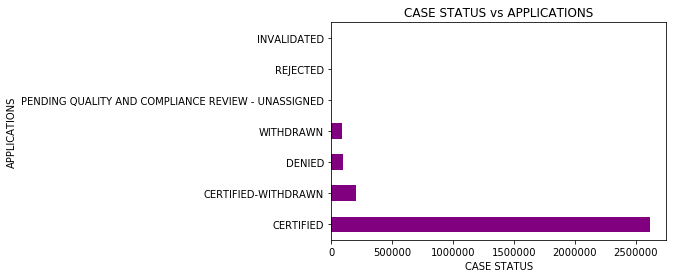

In [7]:
plot = df['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs APPLICATIONS', kind = 'barh', color = 'Purple')
plot.set_xlabel('CASE STATUS')
plot.set_ylabel('APPLICATIONS')
plt.show()

In [8]:
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [9]:
df_den = df[df['CASE_STATUS'] == 'DENIED']
df_cert = df[df['CASE_STATUS'] == 'CERTIFIED']

In [10]:
df_cd = df_den.append(df_cert) # Creating a dataframe with CASE_STATUS restricted to Certified or Denied

In [11]:
df_cd.shape

(2709969, 8)

In [12]:
df_cd['CASE_STATUS'].value_counts()

CERTIFIED    2615623
DENIED         94346
Name: CASE_STATUS, dtype: int64

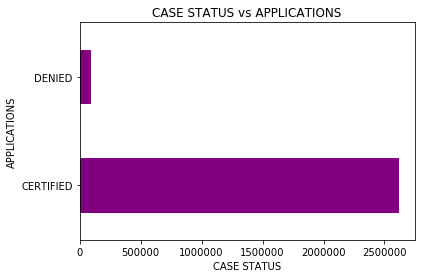

In [13]:
plot = df_cd['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs APPLICATIONS', kind = 'barh', color = 'Purple')
plot.set_xlabel('CASE STATUS')
plot.set_ylabel('APPLICATIONS')
plt.show()

In [14]:
df_cd['EMPLOYER_NAME'].value_counts().head(10) # Top 10 companies with most applicants

INFOSYS LIMITED                      130241
TATA CONSULTANCY SERVICES LIMITED     64358
WIPRO LIMITED                         43679
DELOITTE CONSULTING LLP               36667
ACCENTURE LLP                         32983
IBM INDIA PRIVATE LIMITED             28166
MICROSOFT CORPORATION                 22373
HCL AMERICA, INC.                     22330
ERNST & YOUNG U.S. LLP                18217
LARSEN & TOUBRO INFOTECH LIMITED      16724
Name: EMPLOYER_NAME, dtype: int64

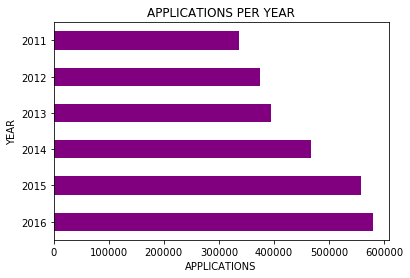

In [15]:
df_cd['YEAR'] = df_cd['YEAR'].astype(int)
plot = df_cd['YEAR'].value_counts().head(10).plot(title = 'APPLICATIONS PER YEAR', kind = 'barh', color = 'Purple')
plot.set_xlabel('APPLICATIONS')
plot.set_ylabel('YEAR')
plt.show()

In [16]:
df_cd['SOC_NAME'].value_counts().head(10) # Top 10 streams of work with most applicants

Computer Systems Analysts                271368
Computer Programmers                     205977
SOFTWARE DEVELOPERS, APPLICATIONS        197937
COMPUTER SYSTEMS ANALYSTS                197932
Software Developers, Applications        174187
COMPUTER PROGRAMMERS                     154598
COMPUTER OCCUPATIONS, ALL OTHER           99767
Computer Occupations, All Other           64892
Software Developers, Systems Software     40544
Management Analysts                       35876
Name: SOC_NAME, dtype: int64

In [17]:
df_cd['JOB_TITLE'].value_counts().head(10) # Top 10 job titles with most applicants

PROGRAMMER ANALYST          226313
SOFTWARE ENGINEER           105315
COMPUTER PROGRAMMER          65399
SYSTEMS ANALYST              56652
SOFTWARE DEVELOPER           38745
BUSINESS ANALYST             35996
COMPUTER SYSTEMS ANALYST     32206
TECHNOLOGY LEAD - US         28312
TECHNOLOGY ANALYST - US      26013
SENIOR SOFTWARE ENGINEER     24109
Name: JOB_TITLE, dtype: int64

In [18]:
df_cd.isnull().sum(axis = 0)

CASE_STATUS               0
EMPLOYER_NAME            18
SOC_NAME              15893
JOB_TITLE                10
FULL_TIME_POSITION        1
PREVAILING_WAGE          53
YEAR                      0
WORKSITE                  0
dtype: int64

In [19]:
df_cd.dropna(subset=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE'], inplace=True) # removing NULL values (NaN)
df_cd.drop_duplicates() # removing duplicates if any 
print(df.shape, df_cd.shape) 

(3002458, 8) (2694002, 8)


In [21]:
df_cd['WORKSITE'] = df_cd['WORKSITE'].str.split(',', n = 1, expand = True)[1] # keeping the name of the state only for WORKSITE

In [22]:
df_cd.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
40,DENIED,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200.0,2016,WASHINGTON
48,DENIED,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,Y,197683.2,2016,CALIFORNIA
92,DENIED,EAGLE MINE LLC,CHIEF EXECUTIVES,GENERAL MANAGER,Y,116334.0,2016,MICHIGAN
96,DENIED,BAKER & MCKENZIE PC,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699.0,2016,ILLINOIS
99,DENIED,"MANITOWOC FSG OPERATIONS, LLC",CHIEF EXECUTIVES,VP DIGITAL STRATEGY,Y,202363.0,2016,FLORIDA


In [58]:
df_cd['WORKSITE'].value_counts().head(10) # Top 10 states with most applicants

 CALIFORNIA       497077
 TEXAS            262450
 NEW YORK         261280
 NEW JERSEY       194532
 ILLINOIS         145385
 MASSACHUSETTS    103288
 PENNSYLVANIA     100382
 FLORIDA           96796
 GEORGIA           94016
 WASHINGTON        91744
Name: WORKSITE, dtype: int64

# Feature Engineering

In [24]:
# CATEGORIZING THE LIKELIKHOOD OF GETTING YOUR VISA ACCEPTED
def acceptance_likelihood(acceptance_rate):
    if acceptance_rate == -1:
        return 'Rejected'
    elif acceptance_rate < 0.25:
        return 'Very less'
    elif 0.5 > acceptance_rate >= 0.25:
        return 'Less'
    elif 0.75 > acceptance_rate >= 0.5:
        return 'Moderate'
    else:
        return 'High'

In [25]:
# ACCEPTANCE RATE FOR EMPLOYER NAME

# Total count of visa applications per Employer
Employer_cases = df_cd.loc[:, ['EMPLOYER_NAME', 'CASE_STATUS']]
total_count = Employer_cases['EMPLOYER_NAME'].value_counts() 

# Count of certified visa grants per Employer
Employer_cases_cert = Employer_cases[Employer_cases['CASE_STATUS'] == 'CERTIFIED']['EMPLOYER_NAME']
cert_count  = Employer_cases_cert.value_counts()

acceptance_per_emp = cert_count/total_count 
acceptance_per_emp.fillna(-1, inplace=True)
acceptance_per_emp = acceptance_per_emp.apply(acceptance_likelihood)
df_cd['EMPLOYER_STATUS'] = df_cd['EMPLOYER_NAME'].map(acceptance_per_emp)

df_cd.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,EMPLOYER_STATUS
40,DENIED,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200.0,2016,WASHINGTON,High
48,DENIED,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,Y,197683.2,2016,CALIFORNIA,Moderate
92,DENIED,EAGLE MINE LLC,CHIEF EXECUTIVES,GENERAL MANAGER,Y,116334.0,2016,MICHIGAN,Moderate
96,DENIED,BAKER & MCKENZIE PC,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699.0,2016,ILLINOIS,Moderate
99,DENIED,"MANITOWOC FSG OPERATIONS, LLC",CHIEF EXECUTIVES,VP DIGITAL STRATEGY,Y,202363.0,2016,FLORIDA,High


In [26]:
# ACCEPTANCE RATE FOR SOC_NAME

# Total count of visa applications per Employer
Soc_cases = df_cd.loc[:, ['SOC_NAME', 'CASE_STATUS']]
total_count = Soc_cases['SOC_NAME'].value_counts() 

# Count of certified visa grants per Employer
Soc_cases_cert = Soc_cases[Soc_cases['CASE_STATUS'] == 'CERTIFIED']['SOC_NAME']
cert_count  = Soc_cases_cert.value_counts()

acceptance_per_soc = cert_count/total_count 
acceptance_per_soc.fillna(-1, inplace=True)
acceptance_per_soc = acceptance_per_soc.apply(acceptance_likelihood)
df_cd['SOC_STATUS'] = df_cd['SOC_NAME'].map(acceptance_per_soc)

df_cd.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,EMPLOYER_STATUS,SOC_STATUS
40,DENIED,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200.0,2016,WASHINGTON,High,High
48,DENIED,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,Y,197683.2,2016,CALIFORNIA,Moderate,High
92,DENIED,EAGLE MINE LLC,CHIEF EXECUTIVES,GENERAL MANAGER,Y,116334.0,2016,MICHIGAN,Moderate,High
96,DENIED,BAKER & MCKENZIE PC,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699.0,2016,ILLINOIS,Moderate,High
99,DENIED,"MANITOWOC FSG OPERATIONS, LLC",CHIEF EXECUTIVES,VP DIGITAL STRATEGY,Y,202363.0,2016,FLORIDA,High,High


In [27]:
# ACCEPTANCE RATE FOR JOB_TITLE

# Total count of visa applications per Employer
Job_cases = df_cd.loc[:, ['JOB_TITLE', 'CASE_STATUS']]
total_count = Job_cases['JOB_TITLE'].value_counts() 

# Count of certified visa grants per Employer
Job_cases_cert = Job_cases[Job_cases['CASE_STATUS'] == 'CERTIFIED']['JOB_TITLE']
cert_count  = Job_cases_cert.value_counts()

acceptance_per_job = cert_count/total_count 
acceptance_per_job.fillna(-1, inplace=True)
acceptance_per_job = acceptance_per_job.apply(acceptance_likelihood)
df_cd['JOB_STATUS'] = df_cd['JOB_TITLE'].map(acceptance_per_job)

df_cd.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,EMPLOYER_STATUS,SOC_STATUS,JOB_STATUS
40,DENIED,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200.0,2016,WASHINGTON,High,High,High
48,DENIED,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,Y,197683.2,2016,CALIFORNIA,Moderate,High,High
92,DENIED,EAGLE MINE LLC,CHIEF EXECUTIVES,GENERAL MANAGER,Y,116334.0,2016,MICHIGAN,Moderate,High,High
96,DENIED,BAKER & MCKENZIE PC,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699.0,2016,ILLINOIS,Moderate,High,Moderate
99,DENIED,"MANITOWOC FSG OPERATIONS, LLC",CHIEF EXECUTIVES,VP DIGITAL STRATEGY,Y,202363.0,2016,FLORIDA,High,High,Rejected


In [28]:
df_cd['FULL_TIME_POSITION'] = df_cd['FULL_TIME_POSITION'].map({'Y':1 ,'N':0}) # Replacing into 1/0 values
df_cd.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,EMPLOYER_STATUS,SOC_STATUS,JOB_STATUS
40,DENIED,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,1,187200.0,2016,WASHINGTON,High,High,High
48,DENIED,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,1,197683.2,2016,CALIFORNIA,Moderate,High,High
92,DENIED,EAGLE MINE LLC,CHIEF EXECUTIVES,GENERAL MANAGER,1,116334.0,2016,MICHIGAN,Moderate,High,High
96,DENIED,BAKER & MCKENZIE PC,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,1,226699.0,2016,ILLINOIS,Moderate,High,Moderate
99,DENIED,"MANITOWOC FSG OPERATIONS, LLC",CHIEF EXECUTIVES,VP DIGITAL STRATEGY,1,202363.0,2016,FLORIDA,High,High,Rejected


In [29]:
df_cd['PREVAILING_WAGE'].mean()

148074.1502153208

In [30]:
df_cd['PREVAILING_WAGE'].describe()

count    2.694002e+06
mean     1.480742e+05
std      5.481327e+06
min      0.000000e+00
25%      5.449600e+04
50%      6.502750e+04
75%      8.139000e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

In [31]:
# Categorizing the wage
def wage_approximation(wage):
    if wage <= 55000:
        return 'Very low'
    elif 90000 >= wage > 55000:
        return 'Low'
    elif 160000 >= wage > 90000:
        return 'Medium'
    else:
        return 'High'

In [32]:
df_cd['WAGE_APPROX'] = df_cd['PREVAILING_WAGE'].apply(wage_approximation) 
df_cd.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,EMPLOYER_STATUS,SOC_STATUS,JOB_STATUS,WAGE_APPROX
40,DENIED,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,1,187200.0,2016,WASHINGTON,High,High,High,High
48,DENIED,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,1,197683.2,2016,CALIFORNIA,Moderate,High,High,High
92,DENIED,EAGLE MINE LLC,CHIEF EXECUTIVES,GENERAL MANAGER,1,116334.0,2016,MICHIGAN,Moderate,High,High,Medium
96,DENIED,BAKER & MCKENZIE PC,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,1,226699.0,2016,ILLINOIS,Moderate,High,Moderate,High
99,DENIED,"MANITOWOC FSG OPERATIONS, LLC",CHIEF EXECUTIVES,VP DIGITAL STRATEGY,1,202363.0,2016,FLORIDA,High,High,Rejected,High


In [33]:
df_cd['CASE_STATUS'] = df_cd['CASE_STATUS'].map({'CERTIFIED':1 ,'DENIED':0})
df_cd.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,EMPLOYER_STATUS,SOC_STATUS,JOB_STATUS,WAGE_APPROX
40,0,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,1,187200.0,2016,WASHINGTON,High,High,High,High
48,0,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,1,197683.2,2016,CALIFORNIA,Moderate,High,High,High
92,0,EAGLE MINE LLC,CHIEF EXECUTIVES,GENERAL MANAGER,1,116334.0,2016,MICHIGAN,Moderate,High,High,Medium
96,0,BAKER & MCKENZIE PC,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,1,226699.0,2016,ILLINOIS,Moderate,High,Moderate,High
99,0,"MANITOWOC FSG OPERATIONS, LLC",CHIEF EXECUTIVES,VP DIGITAL STRATEGY,1,202363.0,2016,FLORIDA,High,High,Rejected,High


In [34]:
temp_training = df_cd.drop(columns=['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'PREVAILING_WAGE']) # Keeping only the essential features 
temp_training.head()

,CASE_STATUS,FULL_TIME_POSITION,YEAR,WORKSITE,EMPLOYER_STATUS,SOC_STATUS,JOB_STATUS,WAGE_APPROX
40,0,1,2016,WASHINGTON,High,High,High,High
48,0,1,2016,CALIFORNIA,Moderate,High,High,High
92,0,1,2016,MICHIGAN,Moderate,High,High,Medium
96,0,1,2016,ILLINOIS,Moderate,High,Moderate,High
99,0,1,2016,FLORIDA,High,High,Rejected,High


In [35]:
training_df = pd.get_dummies(temp_training, columns=['YEAR', 'WORKSITE', 'WAGE_APPROX', 'EMPLOYER_STATUS','JOB_STATUS', 'SOC_STATUS' ], drop_first=True)
training_df.head() # Creating a dataframe with categorical values coverted to indicator values

,CASE_STATUS,FULL_TIME_POSITION,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,WORKSITE_ ALASKA,WORKSITE_ ARIZONA,WORKSITE_ ARKANSAS,...,EMPLOYER_STATUS_Rejected,EMPLOYER_STATUS_Very less,JOB_STATUS_Less,JOB_STATUS_Moderate,JOB_STATUS_Rejected,JOB_STATUS_Very less,SOC_STATUS_Less,SOC_STATUS_Moderate,SOC_STATUS_Rejected,SOC_STATUS_Very less
40,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
99,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
training_df.shape

(2694002, 74)

# Training the model with the dataset prepared

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
# Splitting data into training and test sets for the model
X_train, X_test, y_train, y_test = train_test_split(training_df.iloc[:,1:], training_df.iloc[:, 0], test_size = 0.33, random_state=42) 

In [46]:
X_train.shape, y_train.shape

((1804981, 73), (1804981,))

In [47]:
X_test.shape, y_test.shape

((889021, 73), (889021,))

In [50]:
# USING LOGISTIC REGRESSION AS THE CLASSIFICATION MODEL
model = LogisticRegression()
model.fit(X_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_pred = model.predict(X_test)

# Model performance

In [53]:
import sklearn.metrics as metrics

In [55]:
metrics.confusion_matrix(y_test,y_pred)

array([[  9191,  21442],
       [  3987, 854401]])

In [57]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.30      0.42     30633
          1       0.98      1.00      0.99    858388

avg / total       0.97      0.97      0.97    889021

